## Winters, Alexander (V00970263)

# Problem 8. Linear Movies

### Sources:

SENG 474 Lecture Notes 4 - Linear Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

https://datatofish.com/multiple-linear-regression-python/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [1]:
import numpy as np
np.random.seed(1337)

In [2]:
import pandas as pd
# Plotting support
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv'

df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

## Linear

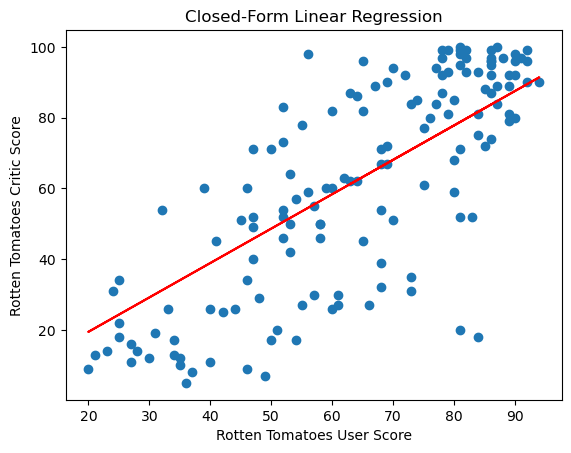

In [4]:
X = df['RottenTomatoes_User'].values
y = df['RottenTomatoes'].values

X = X.reshape(X.shape[0], 1)

w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
y_hat = np.dot(X, w.T)

plt.scatter(X, y)
plt.plot(X, y_hat, color='red')
plt.xlabel('Rotten Tomatoes User Score')
plt.ylabel('Rotten Tomatoes Critic Score')
plt.title('Closed-Form Linear Regression')
plt.show()

## Easy Linear

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics

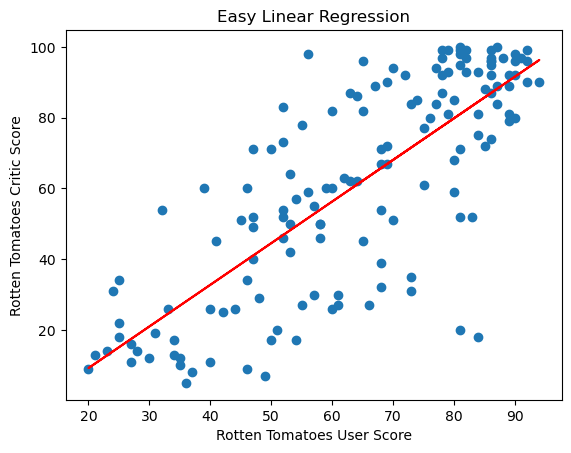

In [6]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

regressor = LinearRegression()
regressor.fit(X, y)

y_pred = regressor.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Rotten Tomatoes User Score')
plt.ylabel('Rotten Tomatoes Critic Score')
plt.title('Easy Linear Regression')
plt.show()

## Not-So-Linear

In [7]:
from sklearn.preprocessing import PolynomialFeatures

### Quadratic

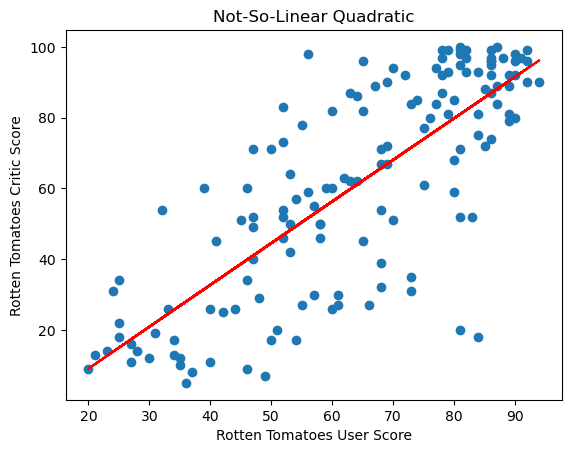

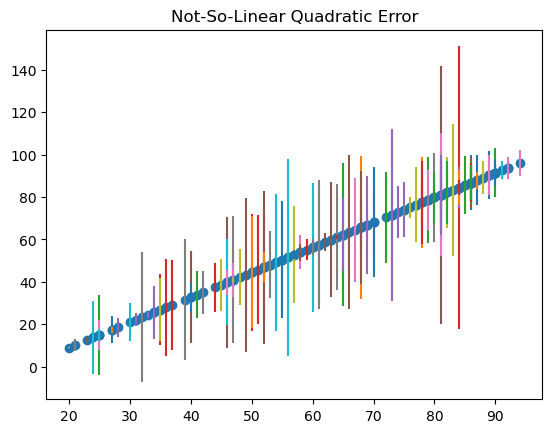

In [8]:
quad = PolynomialFeatures(2)
X_quad = quad.fit_transform(X)

quad_regressor = LinearRegression()
quad_regressor.fit(X_quad, y)

y_pred_quad = quad_regressor.predict(X_quad)

plt.scatter(X, y)
plt.plot(X, y_pred_quad, color='red')
plt.xlabel('Rotten Tomatoes User Score')
plt.ylabel('Rotten Tomatoes Critic Score')
plt.title('Not-So-Linear Quadratic')
plt.show()

quad_err = y_pred_quad - y

for i in range(len(X)):
    plt.errorbar(X[i], y_pred_quad[i], yerr=quad_err[i])
    
plt.scatter(X, y_pred_quad)
plt.title('Not-So-Linear Quadratic Error')
plt.show()

### Cubic

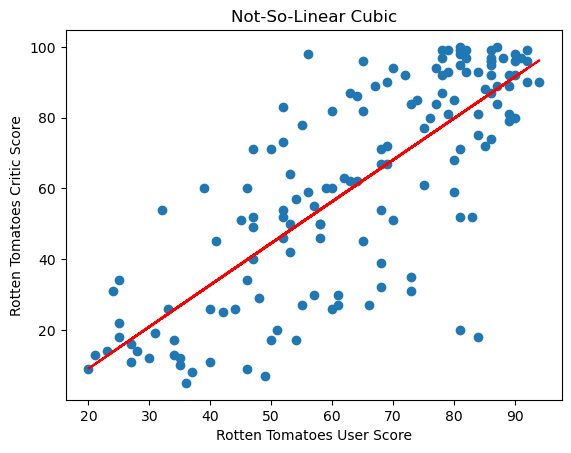

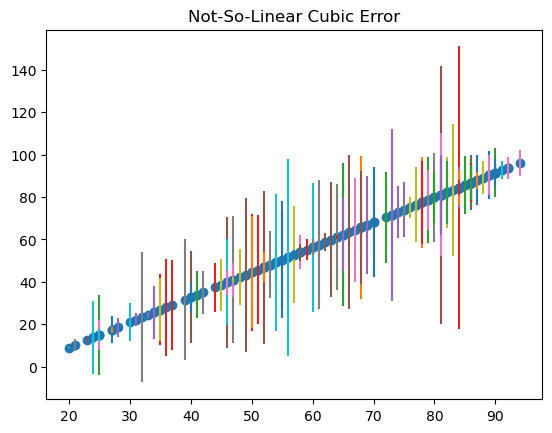

In [9]:
cube = PolynomialFeatures(3)
X_cube = quad.fit_transform(X)

cube_regressor = LinearRegression()
cube_regressor.fit(X_cube, y)

y_pred_cube = cube_regressor.predict(X_cube)

plt.scatter(X, y)
plt.plot(X, y_pred_cube, color='red')
plt.xlabel('Rotten Tomatoes User Score')
plt.ylabel('Rotten Tomatoes Critic Score')
plt.title('Not-So-Linear Cubic')
plt.show()

cube_err = y_pred_cube - y

for i in range(len(X)):
    plt.errorbar(X[i], y_pred_cube[i], yerr=cube_err[i])
    
plt.scatter(X, y_pred_cube)
plt.title('Not-So-Linear Cubic Error')
plt.show()

## Multiple Features

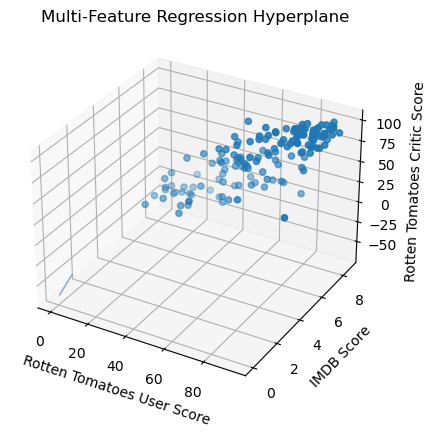

In [10]:
multi_X = df[['RottenTomatoes_User', 'IMDB']]

regressor_3d = LinearRegression()
regressor_3d.fit(multi_X, y)

coefs = regressor_3d.coef_[0]
intercept = regressor_3d.intercept_

x_axis = np.tile(np.arange(2), (1, 1))
y_axis = np.tile(np.arange(2), (1, 1)).T
z_axis = x_axis * coefs[0] + y_axis * coefs[1] + intercept

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_axis, y_axis, z_axis, alpha=0.5)
ax.scatter(multi_X['RottenTomatoes_User'], multi_X['IMDB'], y, marker='o')
ax.set_xlabel('Rotten Tomatoes User Score')
ax.set_ylabel('IMDB Score')
ax.set_zlabel('Rotten Tomatoes Critic Score')
ax.set_title('Multi-Feature Regression Hyperplane')
plt.show()

## Regularize

In [11]:
from sklearn.linear_model import Ridge

In [12]:
df = pd.get_dummies(df, 'FILM')

lambda_list = [0.1, 1, 2]

X_train, X_test, y_train, y_test = train_test_split(df.drop('RottenTomatoes', axis=1), df['RottenTomatoes'], train_size=0.7)

In [13]:
def regularize(X_train, X_test, y_train, y_test, lambda_list):
    ridge_lambdas = {}

    for i in range(len(lambda_list)):
        # Make lamdba value the key
        lda = lambda_list[i]
        ridge_regressor = Ridge(alpha=lambda_list[i])
        ridge_regressor.fit(X_train, y_train)
        y_pred_ridge = ridge_regressor.predict(X_test)

        mse = metrics.mean_squared_error(y_test, y_pred_ridge)
        ridge_lambdas[lda] = mse
    
    return ridge_lambdas
    

In [14]:
reg_results = regularize(X_train, X_test, y_train, y_test, lambda_list)

for key, value in reg_results.items():
    print("Lambda " + str(key) + ": " + str(value))

min_mse = min(reg_results, key=reg_results.get)

print("\nThe Best Lambda Regularization is: Lambda " + str(min_mse) + " with MSE: " + str(reg_results[min_mse]))

Lambda 0.1: 0.9477333639421527
Lambda 1: 1.4407873128167856
Lambda 2: 1.9054749441259835

The Best Lambda Regularization is: Lambda 0.1 with MSE: 0.9477333639421527


### Useless Features

In [15]:
def useless_features(X_train, X_test, y_train, y_test):
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)

    og_mse = metrics.mean_squared_error(y_test, y_pred)

    useless_features = []

    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()

    for feature in X_train.columns:
        train_removed_feature = X_train_copy.pop(feature)
        test_feature_removed = X_test_copy.pop(feature)

        new_ridge = Ridge(alpha=1.0)
        new_ridge.fit(X_train_copy, y_train)

        new_y_pred = new_ridge.predict(X_test_copy)

        new_mse = metrics.mean_squared_error(y_test, new_y_pred)

        if new_mse == og_mse:
            useless_features.append(feature)

        X_train_copy[feature] = train_removed_feature
        X_test_copy[feature] = test_feature_removed
    
    return useless_features 


In [16]:
useless_feats = useless_features(X_train, X_test, y_train, y_test)

if len(useless_feats) == 0:
    print("No Useless Features Found")
else:
    print("Useless Features are:\n")
    for feat in useless_feats:
        print(feat)

No Useless Features Found
